In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

url = 'https://raw.githubusercontent.com/danielmoore19/baseball/master/baseballdatabank-2019.2/core/Pitching.csv'
data = pd.read_csv(url)
data.tail(1)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
46698,zimmejo02,2018,1,DET,AL,7,8,25,25,0,0,0,394,140,66,28,26,111,0.269,4.52,0.0,1,2.0,0,556.0,0,76,2.0,5.0,4.0


In [22]:
lower_starter = data[(data['yearID'] >= 1968) & (data['yearID'] <= 1991) & (data['IPouts'] >= 486)]
steroid_starter = data[(data['yearID'] >= 1992) & (data['yearID'] <= 2003) & (data['IPouts'] >= 486)]
stats_starter = data[(data['yearID'] >= 2004) & (data['IPouts'] >= 486)]
lower_relief = data[(data['yearID'] >= 1968) & (data['yearID'] <= 1991) & (data['IPouts'] >= 30) & (data['IPouts'] < 486)]
steroid_relief = data[(data['yearID'] >= 1992) & (data['yearID'] <= 2003) & (data['IPouts'] >= 30) & (data['IPouts'] < 486)]
stats_relief = data[(data['yearID'] >= 2004) & (data['IPouts'] >= 30) & (data['IPouts'] < 486)]
last5_starter = data[(data['yearID'] >= 2013) & (data['IPouts'] >= 486)]
last5_relief = data[(data['yearID'] >= 2013) & (data['IPouts'] >= 30) & (data['IPouts'] < 240)]

In [9]:
lower_starter.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1729.000000,1729.000000,1489.000000
mean,1979.387560,1.009569,13.305157,11.558745,34.442850,31.509835,8.111111,1.944179,0.340245,659.406167,207.786284,85.498671,18.488570,71.090377,131.781499,0.250702,3.548793,5.045189,6.004785,4.250399,1.260500,919.962786,1.368953,95.973418,8.755350,6.007519,17.592344
std,6.906383,0.102697,4.091431,3.293591,4.948141,5.016996,5.327257,1.689319,1.475733,113.272858,35.983271,16.890830,6.440893,20.791603,46.943239,0.023398,0.693868,3.351021,3.844792,2.841847,1.724411,147.530245,4.163925,18.368403,3.846709,2.647381,6.544387
min,1968.000000,1.000000,2.000000,2.000000,20.000000,0.000000,0.000000,0.000000,0.000000,486.000000,102.000000,38.000000,3.000000,19.000000,44.000000,0.160000,1.120000,0.000000,0.000000,0.000000,0.000000,641.000000,0.000000,41.000000,0.000000,0.000000,3.000000
25%,1973.000000,1.000000,10.000000,9.000000,32.000000,29.000000,4.000000,1.000000,0.000000,570.000000,183.000000,74.000000,14.000000,56.000000,99.000000,0.235000,3.060000,2.000000,3.000000,2.000000,0.000000,804.000000,0.000000,84.000000,6.000000,4.000000,13.000000
50%,1979.000000,1.000000,13.000000,11.000000,34.000000,32.000000,7.000000,2.000000,0.000000,646.000000,207.000000,85.000000,18.000000,69.000000,125.000000,0.251000,3.530000,5.000000,5.000000,4.000000,1.000000,908.000000,0.000000,96.000000,8.000000,6.000000,17.000000
75%,1985.000000,1.000000,16.000000,14.000000,37.000000,35.000000,11.000000,3.000000,0.000000,732.000000,232.000000,97.000000,22.000000,83.000000,155.000000,0.267000,4.020000,7.000000,8.000000,6.000000,2.000000,1016.000000,1.000000,108.000000,11.000000,8.000000,22.000000
max,1991.000000,3.000000,31.000000,22.000000,106.000000,49.000000,30.000000,13.000000,31.000000,1130.000000,381.000000,148.000000,50.000000,204.000000,383.000000,0.322000,5.770000,20.000000,24.000000,21.000000,16.000000,1538.000000,83.000000,166.000000,27.000000,17.000000,47.000000


In [10]:
steroid_starter.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,1997.822472,1.001124,12.837079,10.351685,32.061798,31.095506,2.695506,0.874157,0.067416,605.228090,199.784270,89.632584,21.633708,66.261798,142.873034,0.259520,4.041618,3.595506,5.756180,6.324719,0.813483,856.158427,0.330337,98.264045,7.239326,5.639326,17.195506
std,3.469934,0.033520,3.693453,3.033173,2.980552,3.026483,2.440399,1.040196,0.523846,72.287723,27.876971,17.123940,6.679602,18.632676,43.277412,0.024371,0.841759,2.709476,3.646668,3.672345,1.129937,92.604440,1.295871,18.155588,3.687455,2.563748,5.852324
min,1992.000000,1.000000,4.000000,2.000000,23.000000,15.000000,0.000000,0.000000,0.000000,486.000000,117.000000,35.000000,4.000000,13.000000,46.000000,0.167000,1.560000,0.000000,0.000000,0.000000,0.000000,655.000000,0.000000,39.000000,0.000000,0.000000,2.000000
25%,1995.000000,1.000000,10.000000,8.000000,31.000000,29.000000,1.000000,0.000000,0.000000,546.250000,181.000000,79.000000,17.000000,53.000000,115.000000,0.243000,3.440000,2.000000,3.000000,4.000000,0.000000,784.000000,0.000000,86.000000,4.000000,4.000000,13.000000
50%,1998.000000,1.000000,13.000000,10.000000,32.000000,32.000000,2.000000,1.000000,0.000000,602.000000,199.500000,90.000000,21.000000,66.000000,136.000000,0.261000,4.050000,3.000000,5.000000,6.000000,0.000000,856.000000,0.000000,98.500000,7.000000,5.000000,17.000000
75%,2001.000000,1.000000,15.000000,12.000000,34.000000,33.000000,4.000000,1.000000,0.000000,652.000000,219.000000,100.000000,26.000000,78.000000,164.000000,0.276000,4.580000,5.000000,8.000000,8.000000,1.000000,919.000000,0.000000,109.000000,10.000000,7.000000,21.000000
max,2003.000000,2.000000,24.000000,21.000000,49.000000,36.000000,15.000000,5.000000,11.000000,815.000000,284.000000,145.000000,48.000000,144.000000,372.000000,0.323000,6.660000,17.000000,26.000000,21.000000,9.000000,1108.000000,16.000000,160.000000,22.000000,17.000000,41.000000


In [11]:
stats_starter.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.00000,1135.000000,1135.000000,1135.000000
mean,2010.517181,1.001762,12.617621,10.145374,31.766520,31.333921,1.200000,0.495154,0.013216,586.329515,189.513656,83.369163,21.341850,58.997357,156.070485,0.254485,3.870881,2.912775,5.693392,6.734802,0.593833,821.539207,0.143612,90.45022,6.145374,4.899559,16.826432
std,4.169620,0.059365,3.372266,2.897273,2.040837,2.145181,1.454665,0.794449,0.175184,57.988739,25.712142,15.525320,6.157212,15.943601,41.880029,0.025043,0.789187,2.465702,3.748404,3.502730,0.857459,73.344876,0.612618,16.66558,3.615201,2.368695,5.980923
min,2004.000000,1.000000,4.000000,2.000000,23.000000,23.000000,0.000000,0.000000,0.000000,486.000000,111.000000,38.000000,5.000000,9.000000,56.000000,0.178000,1.660000,0.000000,0.000000,0.000000,0.000000,662.000000,0.000000,41.00000,0.000000,0.000000,1.000000
25%,2007.000000,1.000000,10.000000,8.000000,31.000000,30.000000,0.000000,0.000000,0.000000,539.000000,172.000000,73.000000,17.000000,48.000000,124.000000,0.239000,3.350000,1.000000,3.000000,4.000000,0.000000,765.500000,0.000000,79.00000,3.000000,3.000000,13.000000
50%,2010.000000,1.000000,12.000000,10.000000,32.000000,32.000000,1.000000,0.000000,0.000000,585.000000,189.000000,83.000000,21.000000,59.000000,153.000000,0.254000,3.820000,2.000000,5.000000,6.000000,0.000000,823.000000,0.000000,90.00000,6.000000,5.000000,16.000000
75%,2014.000000,1.000000,15.000000,12.000000,33.000000,33.000000,2.000000,1.000000,0.000000,625.500000,207.500000,93.000000,25.000000,69.000000,183.000000,0.272000,4.390000,4.000000,8.000000,9.000000,1.000000,874.000000,0.000000,101.00000,8.000000,6.000000,21.000000
max,2018.000000,3.000000,24.000000,19.000000,42.000000,35.000000,11.000000,6.000000,5.000000,765.000000,268.000000,134.000000,46.000000,119.000000,308.000000,0.324000,6.990000,15.000000,25.000000,20.000000,6.000000,1065.000000,8.000000,141.00000,21.000000,14.000000,37.000000


In [12]:
lower_relief.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6612.000000,6174.000000,6174.000000,5450.000000
mean,1980.502722,1.086661,3.434967,3.895191,27.659407,5.480339,0.575166,0.148972,2.995312,199.398518,65.927405,29.225953,5.847399,26.430127,39.359195,0.264710,4.224322,3.305656,2.407139,1.531760,0.510587,286.100272,10.974289,32.764519,3.426304,2.377713,5.878165
std,6.918119,0.292430,3.072586,3.145067,18.656692,7.259359,1.280838,0.475423,6.289045,123.679140,41.138258,18.886114,4.605821,17.145752,27.575893,0.042219,1.626957,3.231343,2.322637,1.716758,0.996155,174.419373,13.541823,20.958684,2.894438,2.012643,4.556473
min,1968.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.077000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1975.000000,1.000000,1.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,88.000000,31.000000,14.000000,2.000000,12.000000,16.000000,0.239000,3.150000,1.000000,1.000000,0.000000,0.000000,131.000000,1.000000,16.000000,1.000000,1.000000,2.000000
50%,1981.000000,1.000000,3.000000,3.000000,23.000000,2.000000,0.000000,0.000000,0.000000,186.000000,60.000000,26.000000,5.000000,24.000000,34.000000,0.263000,4.020000,2.000000,2.000000,1.000000,0.000000,268.000000,5.000000,29.000000,3.000000,2.000000,5.000000
75%,1987.000000,1.000000,5.000000,6.000000,40.000000,9.000000,1.000000,0.000000,3.000000,288.000000,92.250000,40.000000,8.000000,37.000000,57.000000,0.290000,5.020000,5.000000,4.000000,2.000000,1.000000,407.250000,16.000000,45.000000,5.000000,4.000000,9.000000
max,1991.000000,4.000000,17.000000,16.000000,94.000000,31.000000,11.000000,5.000000,57.000000,485.000000,211.000000,111.000000,35.000000,143.000000,184.000000,0.448000,15.430000,23.000000,22.000000,15.000000,12.000000,741.000000,84.000000,126.000000,21.000000,12.000000,28.000000


In [13]:
steroid_relief.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000
mean,1997.766865,1.103210,2.985201,3.367288,29.829906,5.049395,0.167596,0.051317,2.599654,172.152796,59.333269,29.251778,6.857006,23.792620,40.809725,0.270433,4.858407,2.202575,2.335768,2.186431,0.292716,251.418797,9.456852,31.985009,2.381703,2.088603,5.026715
std,3.415881,0.315429,2.725274,2.878920,20.662743,7.367910,0.564872,0.250834,7.680584,111.696200,39.988940,20.492570,5.435293,15.662796,28.099098,0.045637,1.915943,2.183458,2.326585,2.199453,0.643065,160.900328,13.134863,22.268446,2.261624,1.893764,4.233280
min,1992.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.083000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1995.000000,1.000000,1.000000,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,79.000000,28.000000,14.000000,3.000000,12.000000,18.000000,0.241000,3.550000,1.000000,1.000000,1.000000,0.000000,120.000000,1.000000,16.000000,1.000000,1.000000,2.000000
50%,1998.000000,1.000000,2.000000,3.000000,24.000000,0.000000,0.000000,0.000000,0.000000,150.000000,50.000000,24.000000,5.000000,21.000000,35.000000,0.270000,4.610000,2.000000,2.000000,2.000000,0.000000,219.000000,5.000000,26.000000,2.000000,2.000000,4.000000
75%,2001.000000,1.000000,4.000000,5.000000,44.000000,8.000000,0.000000,0.000000,1.000000,235.000000,79.000000,38.000000,9.000000,32.000000,58.000000,0.297000,5.840000,3.000000,3.000000,3.000000,0.000000,339.000000,12.000000,42.000000,3.000000,3.000000,7.000000
max,2003.000000,4.000000,16.000000,18.000000,89.000000,31.000000,7.000000,4.000000,55.000000,485.000000,211.000000,119.000000,34.000000,106.000000,213.000000,0.460000,16.030000,17.000000,21.000000,17.000000,7.000000,748.000000,79.000000,128.000000,16.000000,12.000000,28.000000


In [14]:
stats_relief.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000
mean,2011.299161,1.089799,2.784533,3.105062,31.133554,4.704019,0.065759,0.031926,2.343933,160.033706,52.964513,25.381074,6.338463,20.152760,43.930552,0.260265,4.510304,1.702493,2.214449,2.149580,0.196515,230.101882,8.644874,27.482574,1.755279,1.698041,4.608751
std,4.368685,0.296398,2.653385,2.854555,21.507988,7.536590,0.317613,0.192397,7.546911,108.059804,37.833551,18.978534,5.358920,13.726097,31.323858,0.048199,1.871805,1.794461,2.233718,2.182959,0.488695,153.844569,11.884973,20.395620,1.950512,1.688545,4.026318
min,2004.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,30.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.065000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.250000,1.000000,1.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,73.000000,25.000000,12.000000,3.000000,10.000000,19.000000,0.229000,3.240000,0.000000,1.000000,1.000000,0.000000,108.000000,1.000000,13.000000,0.000000,0.000000,2.000000
50%,2011.000000,1.000000,2.000000,2.000000,25.000000,0.000000,0.000000,0.000000,0.000000,138.000000,44.000000,20.000000,5.000000,17.000000,37.000000,0.260000,4.270000,1.000000,2.000000,2.000000,0.000000,200.000000,5.000000,22.000000,1.000000,1.000000,4.000000
75%,2015.000000,1.000000,4.000000,4.000000,47.000000,7.000000,0.000000,0.000000,1.000000,210.000000,67.000000,32.000000,8.000000,27.000000,61.000000,0.290000,5.520000,3.000000,3.000000,3.000000,0.000000,296.000000,11.000000,35.000000,3.000000,3.000000,6.000000
max,2018.000000,5.000000,17.000000,17.000000,94.000000,32.000000,7.000000,3.000000,62.000000,485.000000,213.000000,114.000000,37.000000,104.000000,237.000000,0.470000,16.360000,12.000000,17.000000,19.000000,5.000000,755.000000,71.000000,119.000000,16.000000,11.000000,27.000000


In [17]:
last5_starter.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,2015.242424,1.005051,12.459596,9.848485,31.472222,31.075758,0.891414,0.416667,0.007576,572.871212,178.252525,77.282828,20.984848,55.345960,169.563131,0.246646,3.672778,2.073232,6.058081,6.684343,0.467172,794.204545,0.159091,83.628788,4.891414,4.494949,15.742424
std,1.673870,0.100504,3.353575,2.897799,1.945260,2.004885,1.199505,0.712013,0.086818,53.157812,23.660935,14.505549,5.991536,14.049064,40.592867,0.024537,0.759281,1.768126,3.687702,3.326740,0.737037,65.672537,0.706170,15.486575,3.087062,2.330312,5.599215
min,2013.000000,1.000000,6.000000,2.000000,23.000000,23.000000,0.000000,0.000000,0.000000,486.000000,111.000000,38.000000,5.000000,16.000000,73.000000,0.178000,1.660000,0.000000,0.000000,0.000000,0.000000,662.000000,0.000000,41.000000,0.000000,0.000000,1.000000
25%,2014.000000,1.000000,10.000000,8.000000,31.000000,30.000000,0.000000,0.000000,0.000000,528.000000,162.750000,68.000000,16.750000,45.000000,142.000000,0.233000,3.150000,1.000000,3.000000,4.000000,0.000000,743.750000,0.000000,73.750000,3.000000,3.000000,12.000000
50%,2015.000000,1.000000,12.000000,10.000000,32.000000,32.000000,0.500000,0.000000,0.000000,568.000000,179.000000,77.000000,21.000000,54.500000,165.000000,0.246000,3.630000,2.000000,5.000000,6.000000,0.000000,794.500000,0.000000,83.000000,4.000000,4.000000,15.000000
75%,2017.000000,1.000000,15.000000,12.000000,33.000000,32.000000,1.000000,1.000000,0.000000,607.250000,193.000000,86.250000,25.000000,66.000000,191.000000,0.264250,4.260000,3.000000,8.000000,8.250000,1.000000,843.000000,0.000000,93.000000,7.000000,6.000000,19.000000
max,2018.000000,3.000000,22.000000,19.000000,42.000000,35.000000,6.000000,3.000000,1.000000,731.000000,240.000000,118.000000,41.000000,96.000000,308.000000,0.311000,6.130000,8.000000,22.000000,17.000000,4.000000,961.000000,8.000000,125.000000,17.000000,12.000000,36.000000


In [24]:
last5_relief.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000
mean,2015.610455,1.112424,1.983530,2.190118,31.276763,1.932689,0.012173,0.006087,2.607232,117.987111,37.374866,17.756892,4.649123,14.747583,36.430004,0.253834,4.369782,1.306122,1.926602,1.606516,0.146438,168.051916,9.195131,19.216255,1.020050,1.213749,3.344074
std,1.691053,0.331435,1.815766,1.883046,22.172409,3.617915,0.130552,0.082268,7.783379,60.260304,19.294937,9.967604,3.337195,8.268832,22.519321,0.050362,1.943553,1.464389,1.958739,1.602577,0.414246,83.025533,11.478687,10.608077,1.214301,1.241214,2.754805
min,2013.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,30.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.065000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,1.000000,1.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,64.000000,22.000000,10.000000,2.000000,8.000000,18.000000,0.220000,2.970000,0.000000,0.000000,0.000000,0.000000,95.000000,2.000000,11.000000,0.000000,0.000000,1.000000
50%,2016.000000,1.000000,2.000000,2.000000,25.000000,0.000000,0.000000,0.000000,0.000000,109.000000,35.000000,17.000000,4.000000,14.000000,31.000000,0.253000,4.110000,1.000000,1.000000,1.000000,0.000000,156.000000,6.000000,18.000000,1.000000,1.000000,3.000000
75%,2017.000000,1.000000,3.000000,3.000000,50.000000,2.000000,0.000000,0.000000,1.000000,172.000000,51.000000,23.000000,7.000000,20.000000,51.000000,0.286000,5.460000,2.000000,3.000000,2.000000,0.000000,243.000000,12.000000,25.000000,2.000000,2.000000,5.000000
max,2018.000000,5.000000,10.000000,10.000000,81.000000,29.000000,3.000000,2.000000,57.000000,239.000000,109.000000,61.000000,25.000000,45.000000,126.000000,0.456000,13.500000,10.000000,15.000000,11.000000,4.000000,370.000000,67.000000,66.000000,8.000000,7.000000,18.000000


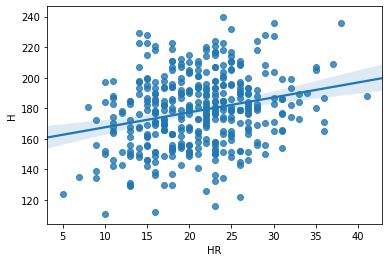

In [26]:
sns.regplot(x='HR', y='H', data=last5_starter)

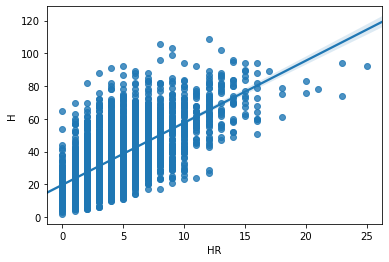

In [25]:
sns.regplot(x='HR', y='H', data=last5_relief)